In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the datatset

In [15]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



#### Data Pre-processing

In [16]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [17]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)


In [19]:
features = data.drop('price', axis=1)
target = data['price']

X = features
y = target


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Feature Scaling

In [21]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Build the model

In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)


#### Evaluate the model

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1959323004717.2698
R² Score: 0.6123660550314123


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = RandomForestRegressor(random_state=42)

# Refined hyperparameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2']             # Valid options for max_features
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,       # 3-fold cross-validation (adjusted for small datasets)
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Perform the search
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Hyperparameters:", random_search.best_params_)
print("Test RMSE:", rmse)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Test RMSE: 1385498.6825201681


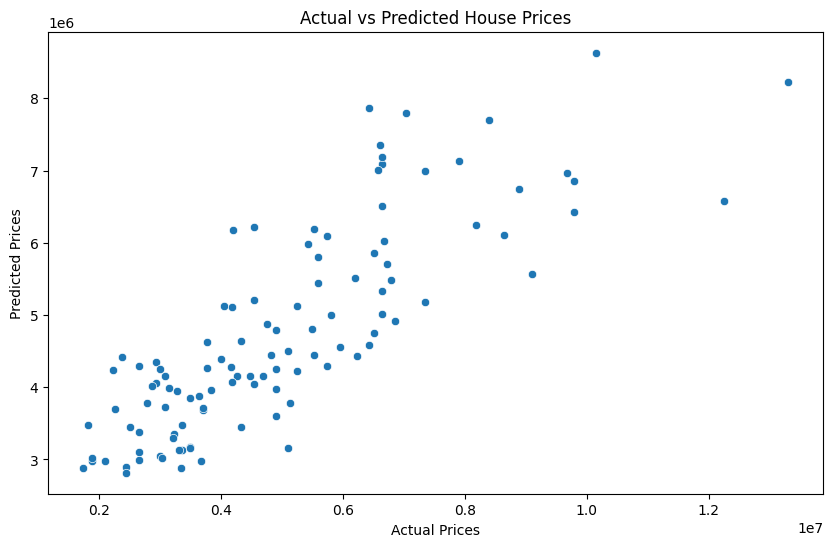

In [26]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

7. Conclusion
Summarize the model's performance based on the evaluation metrics and discuss any potential improvements or next steps.